# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)

## Numpy Overview

* Why Python for Data? Numpy brings decades of C math into Python!
   * Numpy provides wrapper for extensive C/C++/Fortran codebases for data analysis and analytical functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions on vector elements of different shapes)

In [1]:
import pandas as pd
import datetime
import pandas.io.data as web
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
%matplotlib inline
%

/Users/karla/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
ERROR: Line magic function `%` not found.


## Convert Dictionaries to DataFrame

In [2]:
GA_DAT = {'Class':[1,2,3,4,5],
             'Registered':[20,30,40,35,10],
             'Graduated':[19,28,35,20,10]}
df = pd.DataFrame(GA_DAT)   #Convert a dictionary to a dataframe
print(df)  # look up index do you like it? (I don't!)

   Class  Graduated  Registered
0      1         19          20
1      2         28          30
2      3         35          40
3      4         20          35
4      5         10          10


## Let's change index to Class #

In [3]:
df = df.set_index('Class') 
print(df)

       Graduated  Registered
Class                       
1             19          20
2             28          30
3             35          40
4             20          35
5             10          10


In [4]:
df.head()


,Graduated,Registered
Class,,
1,19,20
2,28,30
3,35,40
4,20,35
5,10,10


In [5]:
print(df.Graduated)
print(df['Graduated'])

Class
1    19
2    28
3    35
4    20
5    10
Name: Graduated, dtype: int64
Class
1    19
2    28
3    35
4    20
5    10
Name: Graduated, dtype: int64


In [6]:
print(df[['Graduated','Registered']])

       Graduated  Registered
Class                       
1             19          20
2             28          30
3             35          40
4             20          35
5             10          10


In [7]:
df.describe()  #Summary of your data frame

,Graduated,Registered
count,5.000000,5.000000
mean,22.400000,27.000000
std,9.502631,12.041595
min,10.000000,10.000000
25%,19.000000,20.000000
50%,20.000000,30.000000
75%,28.000000,35.000000
max,35.000000,40.000000


In [8]:
df.describe()['Graduated']['25%']

19.0

# Now let's change DataFrames to Arrays

In [9]:
MyArray = np.array(df[['Graduated','Registered']])
print(MyArray)

[[19 20]
 [28 30]
 [35 40]
 [20 35]
 [10 10]]


## Grouping

In [10]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.684681,0.620313
1,bar,one,0.584642,-0.421096
2,foo,two,0.012850,-1.471623
3,bar,three,0.950683,-0.387724
4,foo,two,-1.504984,-0.892331
5,bar,two,0.262827,0.362569
6,foo,one,-0.493164,-1.448050
7,foo,three,-0.941238,0.231690


In [11]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.584642 -0.421096
    three  0.950683 -0.387724
    two    0.262827  0.362569
foo one    0.095758 -0.413868
    three -0.941238  0.231690
    two   -0.746067 -1.181977

# Now Let's Play with Web Data

In [12]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2016,1,29)

df = web.DataReader("TSLA","yahoo",start,end)
print(df.head())
print(df.tail())


df["Adj Close"].max()



                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001
                  Open        High         Low       Close   Volume  \
Date                                                                  
2016-01-25  200.059998  203.570007  195.880005  196.380005  2698700   
2016-01-26  196.699997  197.820007  188.880005  193.559998  4946800   
2016-01-27  192.380005  193.259995  185.770004  188.070007  3565400   
2016-01-28  190.789993  191.279999  182.410004  189.699997  4581700   
2016-01-29  189.949997  193.740005  188.080002  191.199997  2841000   

286.040009

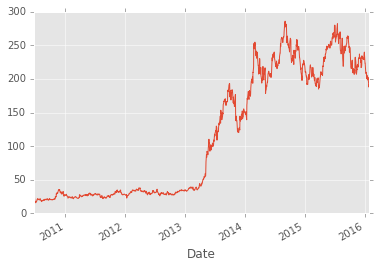

In [13]:
df['Close'].plot()
plt.show()

# Input/output almost any type of Data using Pandas
Using pandas I/O API you can read from, convert to, or write in almost any type of dataset. Please refer to <http://pandas.pydata.org/pandas-docs/stable/io.html> for more info.

## Let's read csv

You can read any file from your local computer by refering to the complete address of your data.

In [15]:
df1 = pd.read_csv('/Users/karla/SF-dat/SF-DAT-20/Data/SF-Median-Prices.csv') 
print(df1)

         Date    Value
0    12/31/15  1138500
1    11/30/15  1126750
2    10/31/15  1093250
3     9/30/15  1080750
4     8/31/15  1138750
5     7/31/15  1124000
6     6/30/15  1156000
7     5/31/15  1125350
8     4/30/15  1115500
9     3/31/15  1185250
10    2/28/15  1020875
11    1/31/15   963250
12   12/31/14  1002675
13   11/30/14  1024825
14   10/31/14   973250
15    9/30/14   954000
16    8/31/14   967750
17    7/31/14   988450
18    6/30/14   966550
19    5/31/14   949000
20    4/30/14   941000
21    3/31/14   943500
22    2/28/14   894100
23    1/31/14   867000
24   12/31/13   844650
25   11/30/13   877750
26   10/31/13   849750
27    9/30/13   832500
28    8/31/13   841500
29    7/31/13   849500
..        ...      ...
207   9/30/98   337800
208   8/31/98   332975
209   7/31/98   336400
210   6/30/98   330125
211   5/31/98   333250
212   4/30/98   315500
213   3/31/98   301000
214   2/28/98   299700
215   1/31/98   317800
216  12/31/97   312350
217  11/30/97   304650
218  10/31/

In [14]:
import os
from os import getcwd
getcwd()

'/Users/karla/SF-dat/SF-DAT-20/Code'

In [16]:
os.chdir('/Users/karla/SF-dat/SF-DAT-20/Data/') #PLEASE SET THIS WORKING DIRECTORY TO YOURS


In [17]:
df2 = pd.read_csv('SF-Median-Prices.csv')
df2.head()

,Date,Value
0,12/31/15,1138500
1,11/30/15,1126750
2,10/31/15,1093250
3,9/30/15,1080750
4,8/31/15,1138750


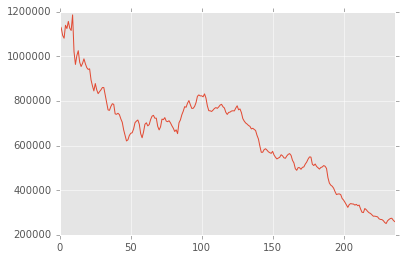

In [18]:
df2['Value'].plot()
plt.show()
#How do you like this graph? What is going wrong? 

In [19]:
df2 = df2.set_index('Date')


In [20]:
df2.head()

,Value
Date,
12/31/15,1138500
11/30/15,1126750
10/31/15,1093250
9/30/15,1080750
8/31/15,1138750


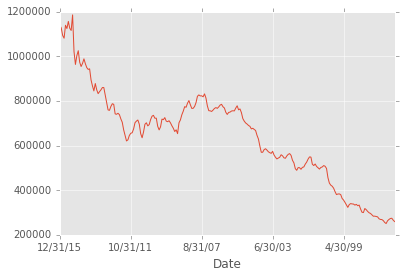

In [24]:
df2['Value'].plot()
plt.show() #the graph looks better - at least has correct labels

## Bonus Question: Can you fix the plot such that it shows ealier dates before later dates?

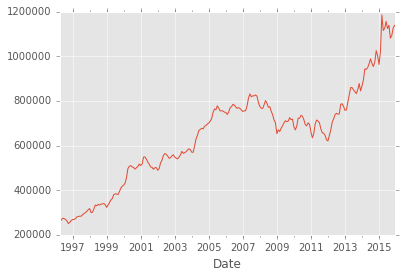

In [32]:
df2.index = pd.to_datetime(df2.index)
ab=df2.sort_index()
ab['Value'].plot()
plt.show() 

Now let's save our dataframe into "html" format

In [ ]:
df2.to_html('SFData.html') #check your working directory

## Now let's rename columns in our DataFrame

In [ ]:
df2 = df2.rename(columns = {'Value':'SFHomeValue'},)

In [ ]:
df2.head()

In [ ]:
df2.loc['12/31/15':'10/31/15',['SFHomeValue']]  #Access to a portion of DataFrame using index

In [ ]:
df2.count()

In [ ]:
df2.describe()

In [ ]:
df2.sort(columns='SFHomeValue')

In [ ]:
df3 = df2[df2.SFHomeValue > 1000000]


In [ ]:
pd.isnull(df3)  #Looking for missing values - output is boolean - True if there is any missing value

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas